In [97]:
# ==============================
# 1. IMPORTAR LIBRERÍAS
# ==============================
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import matplotlib.pyplot as plt
import seaborn as sns


In [98]:
#CARGAR DF
df = pd.read_csv('df_processed_final.csv')

#imprimir columnas
df.columns


Index(['Genero', 'Campesino', 'Estrato', 'NIvel_educacion', 'Discapacidad',
       'Tipo_formacion', 'Victima_del_conflicto', 'tiempo_segundos',
       'Puntaje_eje_tematico_selecionado', 'area_1_alfabetizacion_datos',
       'area_2_comunicacion_y_colaboracion', 'area_3_contenidos_digitales',
       'area_4_seguridad', 'area_5_solucion_de_problemas', 'area_6_igles',
       'Asistencia horas', 'Total_horas posibles', 'etnica_Indígena',
       'etnica_Negro, Mulato, Afrodescendiente, Afrocolombiano',
       'etnica_Ningún grupo étnico',
       'etnica_Raizal del Archipiélago de San Andrés, Providencia y Santa Catalina',
       'etnica_Rrom o gitano', 'linea_1_Explorador - Básico',
       'linea_1_Innovador - Avanzado', 'linea_1_Integrador - Intermedio',
       'linea_2_Explorador - Básico', 'linea_2_Innovador - Avanzado',
       'linea_2_Integrador - Intermedio', 'linea_3_Explorador - Básico',
       'linea_3_Innovador - Avanzado', 'linea_3_Integrador - Intermedio',
       'linea_4_Expl

In [99]:
print(f"Dataset cargado: {df.shape}")

Dataset cargado: (1654, 95)


In [113]:
# Variable objetivo
y = df["exito_academico"]

# Features (todas excepto la target)
X = df.drop(columns=[
    'exito_academico',
    'Asistencia horas',
    'Cohorte_1', 'Cohorte_2', 'Cohorte_3', 'Cohorte_4',
    'Cohorte_5', 'Cohorte_6', 'Cohorte_7', 'Cohorte_8',
    'Cohorte_2_3', 'Cohorte_3_5', 'Cohorte_4_5', 'Cohorte_5_7',
    'Cohorte_6_7', 'Cohorte_6_8',
    'dia', 'mes', 'year',
    'Tipo_de_formacion_Híbrida',

    # Variables de áreas (redundantes por promedio_areas)
    'area_1_alfabetizacion_datos',
    'area_2_comunicacion_y_colaboracion',
    'area_3_contenidos_digitales',
    'area_4_seguridad',
    'area_5_solucion_de_problemas',
    'area_6_igles',

    # Variables categóricas nivel Explorador / Innovador / Integrador
    'area_1_Explorador', 'area_1_Innovador', 'area_1_Integrador',
    'area_2_Explorador', 'area_2_Innovador', 'area_2_Integrador',
    'area_3_Explorador', 'area_3_Innovador', 'area_3_Integrador',
    'area_4_Explorador', 'area_4_Innovador', 'area_4_Integrador',
    'area_5_Explorador', 'area_5_Innovador', 'area_5_Integrador',
    
     # Eje programa (duplicado de eje final)
    'Programa_de_Formación_Arquitectura en la nube',
    'Programa_de_Formación_Blockchain',
    'Programa_de_Formación_Inteligencia artificial',
    'Programa_de_Formación_Programación',
    
    #evitar multicol
    'eje_final_Blockchain', 'Nivel_Intermedio', 'etnica_Raizal del Archipiélago de San Andrés, Providencia y Santa Catalina',
    
    'eje_tematico_Blockchain',
    'eje_tematico_Ciber seguridad y Blockchain',
    'eje_tematico_Computación y arquitectura en la nube',
    'eje_tematico_Datos', 'eje_tematico_Inteligencia artificial',
    'eje_tematico_Programación', 'Programa_de_Formación_Análisis de datos',
    
    'linea_2_Explorador - Básico', 'linea_4_Explorador - Básico', 'linea_3_Innovador - Avanzado', 'linea_2_Innovador - Avanzado',
    'linea_4_Innovador - Avanzado', 'linea_4_Integrador - Intermedio', 'ratio_asistencia',  'ratio_asistencia', 'linea_pca','Total_horas posibles'
    
])


In [114]:
X.columns

Index(['Genero', 'Campesino', 'Estrato', 'NIvel_educacion', 'Discapacidad',
       'Tipo_formacion', 'Victima_del_conflicto', 'tiempo_segundos',
       'Puntaje_eje_tematico_selecionado', 'etnica_Indígena',
       'etnica_Negro, Mulato, Afrodescendiente, Afrocolombiano',
       'etnica_Ningún grupo étnico', 'etnica_Rrom o gitano',
       'linea_1_Explorador - Básico', 'linea_1_Innovador - Avanzado',
       'linea_1_Integrador - Intermedio', 'linea_2_Integrador - Intermedio',
       'linea_3_Explorador - Básico', 'linea_3_Integrador - Intermedio',
       'linea_5_Explorador - Básico', 'linea_5_Innovador - Avanzado',
       'linea_5_Integrador - Intermedio', 'eje_final_Análisis de Datos',
       'eje_final_Arquitectura en la nube',
       'eje_final_Inteligencia artificial', 'eje_final_Programación',
       'Nivel_Avanzado', 'Nivel_Básico', 'Tipo_de_formacion_Virtual',
       'promedio_lineas', 'promedio_areas'],
      dtype='object')


=== CORRELACIONES DE PEARSON ===


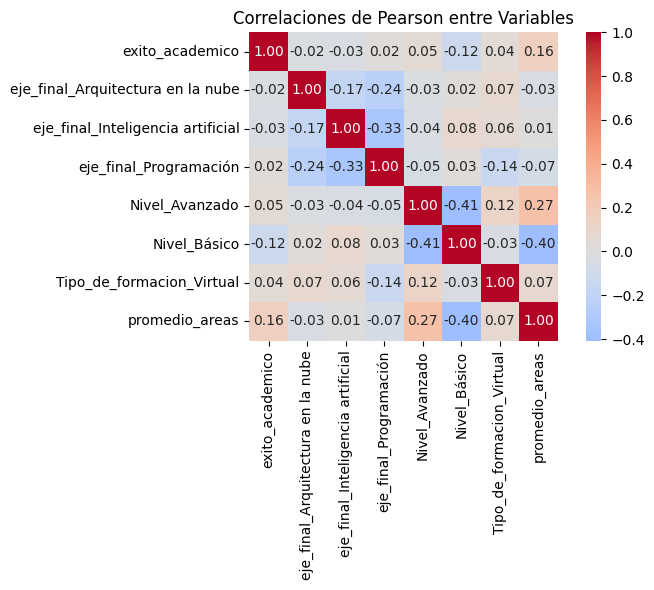

Matriz de correlación de Pearson generada


In [115]:
# Correlaciones (Pearson)
print("\n=== CORRELACIONES DE PEARSON ===")

# Variables importantes para correlacionar
vars_corr = ['exito_academico','eje_final_Arquitectura en la nube',
       'eje_final_Inteligencia artificial', 'eje_final_Programación',
       'Nivel_Avanzado', 'Nivel_Básico', 'Tipo_de_formacion_Virtual',
        'promedio_areas']

vars_disponibles = [v for v in vars_corr if v in df.columns]

if len(vars_disponibles) >= 3:
    corr_matrix = df[vars_disponibles].corr(method='pearson')
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
               square=True, fmt='.2f')
    plt.title('Correlaciones de Pearson entre Variables')
    plt.tight_layout()
    plt.show()
    print("Matriz de correlación de Pearson generada")




In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [117]:
nan_rows_train = X_train[X_train.isna().any(axis=1)]
print(nan_rows_train)


      Genero  Campesino  Estrato  NIvel_educacion  Discapacidad  \
1278     NaN          0     3.09             0.76             0   
665      NaN          1    -1.59            -1.65             0   
1149     NaN          0    -0.42            -0.45             0   
380      NaN          0     0.75             0.16             0   
1085     NaN          0    -0.42             0.16             0   
322      NaN          0     0.75             0.16             0   
317      NaN          0    -0.42             0.76             0   
1161     NaN          0     1.92             0.76             0   

      Tipo_formacion  Victima_del_conflicto  tiempo_segundos  \
1278               0                      0            -1.58   
665                0                      0             0.18   
1149               0                      0             0.78   
380                0                      0             0.48   
1085               0                      0             0.41   
322         

In [105]:
print(df['exito_academico'].value_counts(normalize=True))


exito_academico
1   0.55
0   0.45
Name: proportion, dtype: float64


# Logistic regression

In [118]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
import pandas as pd

# Imputador
imputer = SimpleImputer(strategy='mean')  # reemplaza NaN por la media

# Hiperparámetros
C_values = [0.01, 0.1, 1, 10]
penalties = ['l1', 'l2']
max_iters = [100, 500, 1000]  # distintos max_iter a probar
solver_map = {'l1': 'saga', 'l2': 'lbfgs'}


results = []

for penalty in penalties:
    for C in C_values:
        for max_iter in max_iters:
            # Imputar datos
            X_train_imputed = imputer.fit_transform(X_train)
            X_test_imputed = imputer.transform(X_test)

            # Entrenar modelo
            log_reg = LogisticRegression(
                penalty=penalty,
                C=C,
                solver=solver_map[penalty],
                max_iter=max_iter,
                class_weight='balanced'
            )
            log_reg.fit(X_train_imputed, y_train)
            y_pred = log_reg.predict(X_test_imputed)
            y_prob = log_reg.predict_proba(X_test_imputed)[:,1]

            auc = roc_auc_score(y_test, y_prob)
            acc = accuracy_score(y_test, y_pred)
            cm = confusion_matrix(y_test, y_pred)

            results.append({
                'penalty': penalty,
                'C': C,
                'max_iter': max_iter,
                'accuracy': acc,
                'auc': auc,
                'confusion_matrix': cm
            })


# Convertir a DataFrame y ordenar por AUC
results_df = pd.DataFrame(results).sort_values(by='accuracy', ascending=False)
print(results_df)


/Users/sophiaaristizabal/Documents/GitHub/Proyecto_Machine_Learning/venv/lib/python3.14/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sophiaaristizabal/Documents/GitHub/Proyecto_Machine_Learning/venv/lib/python3.14/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sophiaaristizabal/Documents/GitHub/Proyecto_Machine_Learning/venv/lib/python3.14/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sophiaaristizabal/Documents/GitHub/Proyecto_Machine_Learning/venv/lib/python3.14/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sophiaaristizabal/Documents/GitHub/Proyecto_M

   penalty     C  max_iter  accuracy  auc         confusion_matrix
12      l2  0.01       100      0.62 0.64  [[109, 114], [76, 198]]
14      l2  0.01      1000      0.62 0.64  [[109, 114], [76, 198]]
13      l2  0.01       500      0.62 0.64  [[109, 114], [76, 198]]
10      l1 10.00       500      0.61 0.62   [[128, 95], [97, 177]]
7       l1  1.00       500      0.61 0.62  [[123, 100], [93, 181]]
1       l1  0.01       500      0.61 0.65  [[103, 120], [73, 201]]
8       l1  1.00      1000      0.61 0.62  [[123, 100], [93, 181]]
0       l1  0.01       100      0.61 0.65  [[103, 120], [73, 201]]
2       l1  0.01      1000      0.61 0.65  [[103, 120], [73, 201]]
11      l1 10.00      1000      0.61 0.62   [[125, 98], [98, 176]]
22      l2 10.00       500      0.60 0.61  [[122, 101], [96, 178]]
23      l2 10.00      1000      0.60 0.61  [[122, 101], [96, 178]]
9       l1 10.00       100      0.60 0.62  [[121, 102], [96, 178]]
15      l2  0.10       100      0.60 0.63  [[115, 108], [90, 1

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.impute import SimpleImputer
import pandas as pd

# Imputación (opcional, si hay NaN)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Hiperparámetros a probar
n_estimators_list = [100, 200, 500]          # número de árboles
max_depth_list = [None, 5, 10, 20]           # profundidad máxima
min_samples_split_list = [2, 5, 10]          # min samples para dividir
min_samples_leaf_list = [1, 2, 4]            # min samples por hoja

results_rf = []

for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        for min_samples_split in min_samples_split_list:
            for min_samples_leaf in min_samples_leaf_list:
                rf = RandomForestClassifier(
                    n_estimators=n_estimators,
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf,
                    class_weight='balanced',
                    random_state=42,
                    n_jobs=-1
                )
                rf.fit(X_train_imputed, y_train)
                y_pred = rf.predict(X_test_imputed)
                y_prob = rf.predict_proba(X_test_imputed)[:,1]

                auc = roc_auc_score(y_test, y_prob)
                acc = accuracy_score(y_test, y_pred)
                cm = confusion_matrix(y_test, y_pred)

                results_rf.append({
                    'n_estimators': n_estimators,
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split,
                    'min_samples_leaf': min_samples_leaf,
                    'accuracy': acc,
                    'auc': auc,
                    'confusion_matrix': cm
                })

# Convertir a DataFrame y ordenar por AUC
results_rf_df = pd.DataFrame(results_rf).sort_values(by='accuracy', ascending=False)
print(results_rf_df)


# XGBOOST

In [112]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.impute import SimpleImputer
import pandas as pd

# Imputación opcional si hay NaN
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Hiperparámetros a probar
n_estimators_list = [100, 200, 500]
max_depth_list = [3, 5, 7, 10]
learning_rate_list = [0.01, 0.05, 0.1]
subsample_list = [0.7, 0.8, 1.0]

results_xgb = []

for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        for lr in learning_rate_list:
            for subsample in subsample_list:
                model = xgb.XGBClassifier(
                    n_estimators=n_estimators,
                    max_depth=max_depth,
                    learning_rate=lr,
                    subsample=subsample,
                    use_label_encoder=False,
                    eval_metric='logloss',
                    random_state=42,
                    n_jobs=-1
                )
                model.fit(X_train_imputed, y_train)
                y_pred = model.predict(X_test_imputed)
                y_prob = model.predict_proba(X_test_imputed)[:,1]

                auc = roc_auc_score(y_test, y_prob)
                acc = accuracy_score(y_test, y_pred)
                cm = confusion_matrix(y_test, y_pred)

                results_xgb.append({
                    'n_estimators': n_estimators,
                    'max_depth': max_depth,
                    'learning_rate': lr,
                    'subsample': subsample,
                    'accuracy': acc,
                    'auc': auc,
                    'confusion_matrix': cm
                })

# Convertir a DataFrame y ordenar por AUC
results_xgb_df = pd.DataFrame(results_xgb).sort_values(by='accuracy', ascending=False)
print(results_xgb_df)


/Users/sophiaaristizabal/Documents/GitHub/Proyecto_Machine_Learning/venv/lib/python3.14/site-packages/xgboost/training.py:199: UserWarning: [23:06:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sophiaaristizabal/Documents/GitHub/Proyecto_Machine_Learning/venv/lib/python3.14/site-packages/xgboost/training.py:199: UserWarning: [23:06:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sophiaaristizabal/Documents/GitHub/Proyecto_Machine_Learning/venv/lib/python3.14/site-packages/xgboost/training.py:199: UserWarning: [23:06:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/sophiaaristizabal/Documents/GitHub/Proyecto_Machine_Learning

    n_estimators  max_depth  learning_rate  subsample  accuracy  auc  \
0            100          3           0.01       0.70      0.62 0.61   
1            100          3           0.01       0.80      0.61 0.61   
37           200          3           0.01       0.80      0.61 0.62   
38           200          3           0.01       1.00      0.61 0.61   
42           200          3           0.10       0.70      0.61 0.59   
..           ...        ...            ...        ...       ...  ...   
97           500          7           0.10       0.80      0.55 0.56   
58           200          7           0.05       0.80      0.55 0.57   
21           100          7           0.05       0.70      0.54 0.58   
29           100         10           0.01       1.00      0.54 0.57   
95           500          7           0.05       1.00      0.53 0.56   

          confusion_matrix  
0   [[69, 154], [35, 239]]  
1   [[66, 157], [36, 238]]  
37  [[78, 145], [49, 225]]  
38  [[82, 141], [53